# Spectrograms Model 2
For this model we will be using: **DenseNet201** which is a larger architecture than the previous model. The data we will be using is from *rap_test* which is the second dataset that consist of 300 songs. 

In this notebook we will optimize our model by performing **Hyper parameter search** and **fine-tuning** methods. 

In [1]:
import torch
from torchvision.models import *
from fastai.vision import *

import numpy as np
import pandas as pd
import os

In [2]:
images_path = './spectrograms_test_two/spectrograms/'
os.listdir(images_path)

['models', 'fire', 'trash']

In [7]:
# # # removing tmp.pth files - data on densenet169 model, to start fresh
# for f in os.listdir(f'{images_path}/models'):
#     os.remove(f'{images_path}/models/{f}')

# os.listdir(f'{images_path}/models')

[]

In [3]:
path = Path(images_path)
path.ls()

[PosixPath('spectrograms_test_two/spectrograms/models'),
 PosixPath('spectrograms_test_two/spectrograms/fire'),
 PosixPath('spectrograms_test_two/spectrograms/trash')]

In [4]:
tfms_ = get_transforms(do_flip=True, flip_vert=False, max_rotate=0.0, max_zoom=0.02, max_lighting=0.01, max_warp=0.0)

# source object
seed = np.random.seed(42)
src = (ImageItemList.from_folder(path)
                    .random_split_by_pct(.10, seed)
                    .label_from_folder())

# Creating data object functions - return data object
def get_data(image_size, batch_size):
    data = (src.transform(tfms=tfms_, size=image_size)
               .databunch(num_workers=2, bs=batch_size).normalize(imagenet_stats))
    return data

In [5]:
"""
pct(.10) = 31 images in validation set
"""
data = get_data((432, 684), 4)

### Testing Models - Dropout
One thing I have realized from performing fine-tuning to previous models is that lr will effect each model differently. Thus performing ```learn.lr_find()``` to each test will be crucial. 

We will then create **6 initial models** which we will test for **dropout** 

For each initial model we will ```learn.save()``` in the following format with respective dropout rates:
```python
models = {
    'A': 0.1,
    'B': 0.2,
    'C': 0.3,
    'D': 0.4,
    'E': 0.5, # default
    'F': 0.6
}
```

Before parameter searching we will save each model as: ```learn.save('A_pre')```. Therefor when conducting a test we simply call ```learn.load('A_pre')``` so our learning rate doesn't have to change. 

Therefor each model we will use our best intuition for optimal learning rate, if we are unsure, we will conduct multiple test

In [7]:
"""
MODEL: A
dropout = 0.1
"""
arch = densenet201
learn = create_cnn(data, arch, metrics=[accuracy],ps=0.1)
# learn.lr_find()
# learn.recorder.plot()

/opt/conda/envs/fastai/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [14]:
learn.save('A_pre')

In [15]:
"""
TEST 1: Model A
"""
lr = 1e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.577716,0.411659,0.833333
2,0.542044,0.248536,0.888889
3,0.420120,0.249911,0.944444
4,0.496696,0.236888,0.944444
5,0.348037,0.235660,0.916667


In [16]:
learn.save('A1')

In [8]:
"""
TEST 2: Model A
"""
learn.load('A_pre')
learn.data = data
lr = 2e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.607825,0.753723,0.777778
2,0.605587,0.402231,0.805556
3,0.422277,0.341887,0.888889
4,0.353583,0.215673,0.916667
5,0.324643,0.203989,0.944444


In [9]:
# we can train this for more
learn.save('A2')

In [10]:
"""
TEST 2: Model A
"""
learn.load('A_pre')
learn.data = data
lr = 3e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.720927,0.426209,0.777778
2,0.663427,0.783223,0.666667
3,0.574883,0.573187,0.805556
4,0.440781,0.358693,0.916667
5,0.342779,0.334478,0.916667


In [11]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (328 items)
[Category fire, Category fire, Category fire, Category fire, Category fire]...
Path: spectrograms_test_two/spectrograms
x: ImageItemList (328 items)
[Image (3, 864, 1368), Image (3, 864, 1368), Image (3, 864, 1368), Image (3, 864, 1368), Image (3, 864, 1368)]...
Path: spectrograms_test_two/spectrograms;

Valid: LabelList
y: CategoryList (36 items)
[Category fire, Category fire, Category fire, Category trash, Category fire]...
Path: spectrograms_test_two/spectrograms
x: ImageItemList (36 items)
[Image (3, 864, 1368), Image (3, 864, 1368), Image (3, 864, 1368), Image (3, 864, 1368), Image (3, 864, 1368)]...
Path: spectrograms_test_two/spectrograms;

Test: None

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


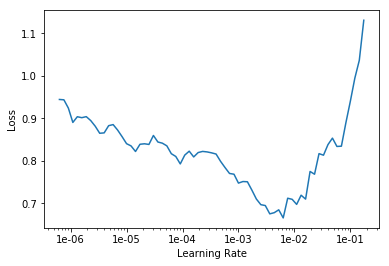

In [12]:
"""
MODEL: B
dropout = 0.2
"""
arch = densenet201
learn = create_cnn(data, arch, metrics=[accuracy],ps=0.2)
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.save('B_pre')

In [14]:
"""
TEST 1: Model B
"""
# learn.load('B_pre')
# learn.data = data
lr = 3e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.719788,0.384991,0.916667
2,0.673088,0.342757,0.861111
3,0.592039,0.323357,0.888889
4,0.438458,0.213878,0.916667
5,0.410987,0.203447,0.916667


In [16]:
"""
TEST 2: Model B
"""
learn.load('B_pre')
learn.data = data
lr = 7e-4
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.655319,0.382167,0.916667
2,0.578777,0.302839,0.888889
3,0.541083,0.137506,0.944444
4,0.450801,0.135754,0.972222
5,0.432082,0.157680,0.944444


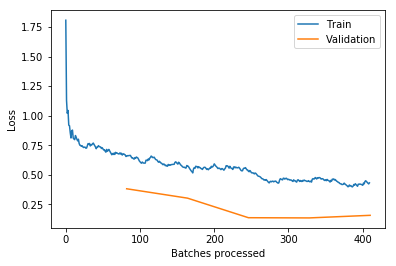

In [17]:
learn.recorder.plot_losses()

In [18]:
learn.save('B2')

In [19]:
"""
TEST 3: Model B
"""
learn.load('B_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.670974,0.434919,0.833333
2,0.654000,0.654689,0.777778
3,0.527289,0.319003,0.861111
4,0.392058,0.195075,0.916667
5,0.394257,0.222155,0.944444


In [21]:
learn.save('B3')

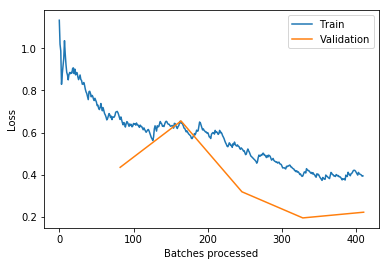

In [20]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


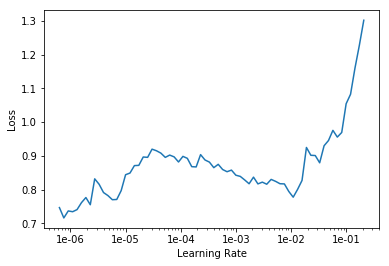

In [22]:
"""
MODEL: C
dropout = 0.3
"""
arch = densenet201
learn = create_cnn(data, arch, metrics=[accuracy],ps=0.3)
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.save('C_pre')

In [24]:
"""
TEST 1: Model C
"""
# learn.load('C_pre')
# learn.data = data
lr = 1e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.687836,0.589439,0.861111
2,0.647374,0.319141,0.861111
3,0.633809,0.384782,0.861111
4,0.524993,0.300572,0.916667
5,0.407331,0.310610,0.944444


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


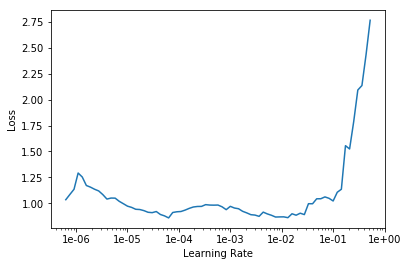

In [26]:
"""
MODEL: D
dropout = 0.4
"""
arch = densenet201
learn = create_cnn(data, arch, metrics=[accuracy],ps=0.4)
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.save('D_pre')

In [28]:
"""
TEST 1: Model D
"""
learn.load('D_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.713780,0.490391,0.833333
2,0.585918,0.240330,0.888889
3,0.604935,0.300058,0.944444
4,0.550207,0.287828,0.944444
5,0.516746,0.260470,0.944444


In [30]:
learn.save('D1')

In [31]:
"""
TEST 2: Model D
"""
learn.load('D_pre')
learn.data = data
lr = 1e-2
learn.fit(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,1.128809,0.850167,0.583333
2,0.837127,0.586348,0.833333
3,0.750754,0.869307,0.750000
4,0.801858,0.702099,0.833333
5,0.643851,1.877921,0.805556


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


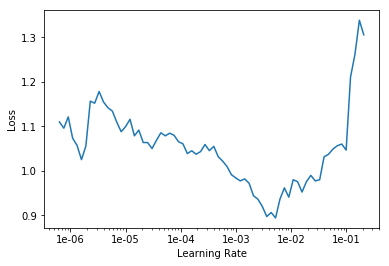

In [32]:
"""
MODEL: E
dropout = 0.5
"""
arch = densenet201
learn = create_cnn(data, arch, metrics=[accuracy],ps=0.5)
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.save('E_pre')

In [34]:
"""
TEST 1: Model E
"""
# learn.load('E_pre')
# learn.data = data
lr = 8e-4
learn.fit(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.846112,0.350440,0.805556
2,0.544989,0.263890,0.916667
3,0.493393,0.204880,0.916667
4,0.522979,0.273696,0.916667
5,0.494962,0.222043,0.916667


In [36]:
"""
TEST 2: Model E
"""
learn.load('E_pre')
learn.data = data
lr = 1e-3
learn.fit(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.756947,0.518528,0.777778
2,0.625946,0.338651,0.777778
3,0.533935,0.254519,0.861111
4,0.481296,0.340273,0.777778
5,0.434908,0.376209,0.833333


In [37]:
"""
TEST 2: Model E
"""
learn.load('E_pre')
learn.data = data
lr = 6e-4
learn.fit(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.809351,0.441593,0.777778
2,0.605325,0.497242,0.861111
3,0.560194,0.402564,0.833333
4,0.548309,0.562486,0.833333
5,0.447842,0.249321,0.916667


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


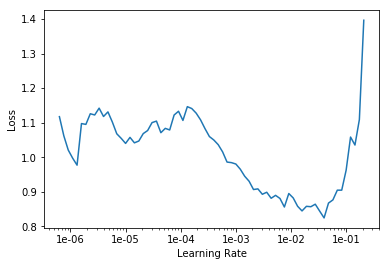

In [38]:
"""
MODEL: F
dropout = 0.6
"""
arch = densenet201
learn = create_cnn(data, arch, metrics=[accuracy],ps=0.6)
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.save('F_pre')

In [40]:
"""
TEST 1: Model F
"""
# learn.load('F_pre')
# learn.data = data
lr = 2e-3
learn.fit(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.781201,0.644150,0.750000
2,0.724605,0.310856,0.888889
3,0.613082,0.429670,0.777778
4,0.559292,0.341580,0.861111
5,0.476919,0.432310,0.861111


In [41]:
"""
TEST 1: Model F
"""
learn.load('F_pre')
learn.data = data
lr = 3e-4
learn.fit(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.795467,0.424503,0.833333
2,0.616611,0.352057,0.833333
3,0.558979,0.423618,0.861111
4,0.504456,0.280425,0.888889
5,0.549412,0.273072,0.888889


### Testing Models - Momemtum
For this test we will be loading models that have performed the best: 

**Model A, Test 1**
```python
"""
TEST 1: Model A
"""
learn.load('A_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(5, slice(lr))
```

**Model A, Test 2**
```python
"""
TEST 2: Model A
"""
learn.load('A_pre')
learn.data = data
lr = 2e-3
learn.fit_one_cycle(5, slice(lr))
```

**Model B, Test 2**
```python
"""
TEST 2: Model B
"""
learn.load('B_pre')
learn.data = data
lr = 7e-4
learn.fit_one_cycle(5, slice(lr))
```

**Model B, Test 3**
```python
"""
TEST 3: Model B
"""
learn.load('B_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(5, slice(lr))
```

**Model D, Test 1**
```python
"""
TEST 1: Model D
"""
learn.load('D_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(5, slice(lr))
```

We will then begin by loading **pre** models, so we can apply the same learning rate along with same **dropout** 

What we will be looking for here is how well the model **generalizes**, thus we will be training for more epochs **20**

For the models that perform the best, we will save and continue with regularization before moving onto **fine-tuning** methods

In [47]:
"""
TEST 1a: Model A
"""
momentum = (0.99, 0.90)
learn.load('A_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(20, slice(lr), moms=momentum)

epoch,train_loss,valid_loss,accuracy
1,0.846849,0.599165,0.722222
2,0.723583,0.369088,0.833333
3,0.701037,0.268288,0.888889
4,0.599717,0.231660,0.916667
5,0.613028,0.309176,0.888889
6,0.662170,0.329644,0.916667
7,0.607155,0.194059,0.916667
8,0.428953,0.249063,0.888889
9,0.421470,0.227048,0.888889
10,0.484112,0.286925,0.916667


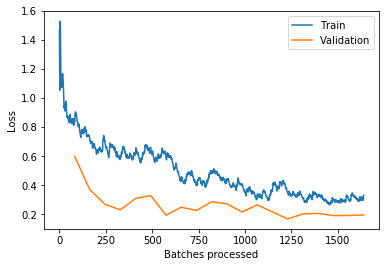

In [48]:
learn.recorder.plot_losses()

In [49]:
"""
TEST 1b: Model A - BEST
"""
momentum = (0.90, 0.80)
learn.load('A_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(20, slice(lr), moms=momentum)

epoch,train_loss,valid_loss,accuracy
1,0.935029,0.624079,0.722222
2,0.798082,0.386276,0.833333
3,0.710679,0.446295,0.861111
4,0.649847,0.496838,0.805556
5,0.670350,0.443000,0.805556
6,0.520217,0.310749,0.861111
7,0.507876,0.252226,0.916667
8,0.515639,0.202738,0.888889
9,0.489944,0.308864,0.861111
10,0.439811,0.236031,0.888889


In [50]:
"""
TEST 1c: Model A
"""
# momentum = (0.90, 0.80) - Testing Default
learn.load('A_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(20, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.854735,0.568443,0.694444
2,0.692251,0.455150,0.833333
3,0.786613,0.283279,0.916667
4,0.661626,0.309590,0.888889
5,0.656664,0.288534,0.833333
6,0.600004,0.355427,0.861111
7,0.532453,0.364019,0.833333
8,0.508513,0.296514,0.888889
9,0.481654,0.281682,0.861111
10,0.459428,0.368794,0.833333


In [52]:
"""
TEST 2a: Model A
"""
momentum = (0.99, 0.90)
learn.load('A_pre')
learn.data = data
lr = 2e-3
learn.fit_one_cycle(20, slice(lr), moms=momentum)

epoch,train_loss,valid_loss,accuracy
1,0.836527,0.546011,0.777778
2,0.758920,0.327454,0.861111
3,0.624171,0.576899,0.861111
4,0.527965,0.250736,0.916667
5,0.617702,0.370027,0.833333
6,0.576059,0.313790,0.944444
7,0.552815,0.283044,0.888889
8,0.550001,0.285438,0.916667
9,0.449895,0.249942,0.861111
10,0.454389,0.398434,0.861111


In [53]:
"""
TEST 2b: Model A
"""
momentum = (0.90, 0.80)
learn.load('A_pre')
learn.data = data
lr = 2e-3
learn.fit_one_cycle(20, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.807527,0.518462,0.805556
2,0.706495,0.287891,0.888889
3,0.694692,0.272880,0.888889
4,0.585793,0.196935,0.944444
5,0.604649,0.207646,0.916667
6,0.545732,0.367484,0.833333
7,0.528511,0.324583,0.916667
8,0.506886,0.299586,0.861111
9,0.542191,0.342147,0.861111
10,0.510718,0.269510,0.888889


In [59]:
"""
TEST 2a: Model B
"""
momentum = (0.99, 0.90)
learn.load('B_pre')
learn.data = data
lr = 7e-4
learn.fit_one_cycle(20, slice(lr), moms=momentum)

epoch,train_loss,valid_loss,accuracy
1,0.947093,0.589322,0.611111
2,0.697368,0.340084,0.916667
3,0.645681,0.443104,0.888889
4,0.637060,0.355764,0.888889
5,0.597153,0.304301,0.888889
6,0.547882,0.336099,0.861111
7,0.623420,0.236402,0.888889
8,0.546690,0.297557,0.888889
9,0.606397,0.263691,0.944444
10,0.509773,0.253123,0.944444


In [60]:
learn.save('B2a')

In [61]:
"""
TEST 2b: Model B
"""
momentum = (0.90, 0.80)
learn.load('B_pre')
learn.data = data
lr = 7e-4
learn.fit_one_cycle(20, slice(lr), moms=momentum)

epoch,train_loss,valid_loss,accuracy
1,0.865003,0.547535,0.666667
2,0.739876,0.328891,0.888889
3,0.711208,0.359238,0.861111
4,0.611484,0.242081,0.888889
5,0.542475,0.310783,0.861111
6,0.539553,0.289970,0.888889
7,0.516246,0.224593,0.916667
8,0.488579,0.308384,0.861111
9,0.478567,0.320284,0.861111
10,0.467885,0.262073,0.916667


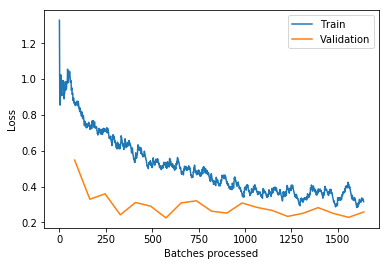

In [62]:
learn.recorder.plot_losses()

In [63]:
"""
TEST 2c: Model B
"""
# momentum = (0.90, 0.80) - DEFAULT
learn.load('B_pre')
learn.data = data
lr = 7e-4
learn.fit_one_cycle(20, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.839820,0.487066,0.750000
2,0.824498,0.364705,0.833333
3,0.670123,0.334204,0.916667
4,0.646514,0.322838,0.888889
5,0.584505,0.403634,0.861111
6,0.481726,0.265158,0.944444
7,0.532776,0.255030,0.944444
8,0.519007,0.217386,0.944444
9,0.526409,0.298351,0.916667
10,0.453007,0.289121,0.916667


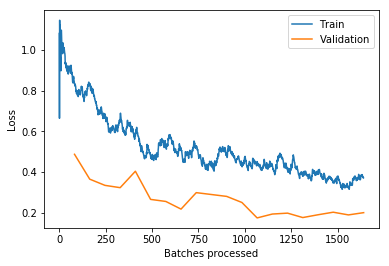

In [64]:
learn.recorder.plot_losses()

In [65]:
learn.save('B2c')

In [66]:
"""
TEST 3a: Model B
"""
momentum = (0.99, 0.90)
learn.load('B_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(20, slice(lr), moms=momentum)

epoch,train_loss,valid_loss,accuracy
1,0.813266,0.479268,0.805556
2,0.752639,0.288112,0.888889
3,0.661509,0.443481,0.777778
4,0.523080,0.343058,0.888889
5,0.603397,0.248121,0.861111
6,0.559037,0.387384,0.916667
7,0.589881,0.169509,0.972222
8,0.528993,0.189416,0.916667
9,0.440605,0.256239,0.888889
10,0.470420,0.239575,0.944444


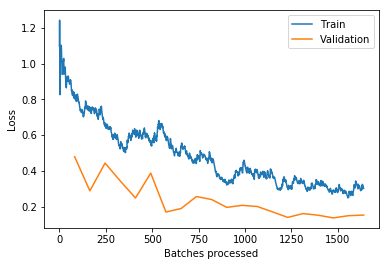

In [67]:
learn.recorder.plot_losses()

In [68]:
learn.save('B3a')

In [69]:
"""
TEST 3b: Model B
"""
momentum = (0.90, 0.80)
learn.load('B_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(20, slice(lr), moms=momentum)

epoch,train_loss,valid_loss,accuracy
1,0.831757,0.456211,0.833333
2,0.748639,0.316542,0.861111
3,0.711114,0.341381,0.833333
4,0.653158,0.194087,0.916667
5,0.615937,0.254862,0.944444
6,0.593667,0.297265,0.888889
7,0.513886,0.356909,0.833333
8,0.555880,0.350577,0.833333
9,0.498884,0.345909,0.861111
10,0.421406,0.423012,0.833333


In [70]:
"""
TEST 3c: Model B
"""
# momentum = (0.90, 0.80)
learn.load('B_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(20, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.799443,0.494169,0.750000
2,0.660205,0.270651,0.916667
3,0.686636,0.247748,0.888889
4,0.646319,0.242243,0.888889
5,0.672272,0.341434,0.861111
6,0.499042,0.250687,0.944444
7,0.513597,0.252185,0.916667
8,0.573394,0.287926,0.861111
9,0.474289,0.175401,0.916667
10,0.447085,0.179023,0.972222


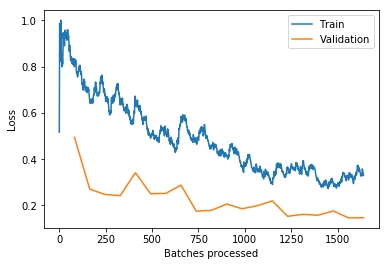

In [72]:
learn.recorder.plot_losses()

In [71]:
learn.save('B3c')

In [73]:
"""
TEST 1a: Model D
"""
momentum = (0.99, 0.90)
learn.load('D_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(20, slice(lr), moms=momentum)

epoch,train_loss,valid_loss,accuracy
1,0.934975,0.592589,0.861111
2,0.785932,0.333660,0.833333
3,0.666410,0.282652,0.888889
4,0.621944,0.450943,0.861111
5,0.598736,0.284385,0.916667
6,0.563372,0.260483,0.833333
7,0.485735,0.245937,0.916667
8,0.543083,0.340250,0.777778
9,0.510602,0.239968,0.916667
10,0.451212,0.274131,0.916667


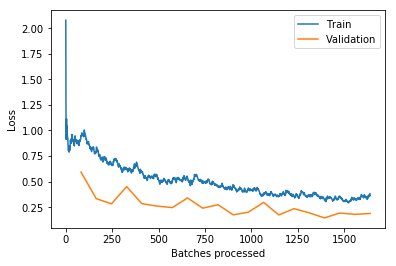

In [74]:
learn.recorder.plot_losses()

In [75]:
learn.save('D1a')

In [76]:
"""
TEST 1b: Model D
"""
momentum = (0.90, 0.80)
learn.load('D_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(20, slice(lr), moms=momentum)

epoch,train_loss,valid_loss,accuracy
1,0.949553,0.570938,0.777778
2,0.765709,0.322875,0.888889
3,0.729526,0.372324,0.805556
4,0.706920,0.255422,0.916667
5,0.643747,0.386897,0.805556
6,0.639285,0.228909,0.861111
7,0.503840,0.288660,0.888889
8,0.465858,0.462970,0.750000
9,0.423873,0.295664,0.888889
10,0.404061,0.403785,0.861111


In [77]:
"""
TEST 1c: Model D
"""
# momentum = (0.90, 0.80)
learn.load('D_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(20, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.881591,0.530772,0.777778
2,0.781669,0.352674,0.916667
3,0.744906,0.292477,0.861111
4,0.710742,0.336603,0.861111
5,0.623371,0.302345,0.944444
6,0.563732,0.264658,0.916667
7,0.529835,0.365948,0.833333
8,0.522491,0.265091,0.888889
9,0.464269,0.365458,0.833333
10,0.444455,0.278556,0.944444


### Testing Models - Weight Decay
We will be taking two of our best performing models: 

**Model B, Test 3a**
```python
"""
TEST 3a: Model B
"""
momentum = (0.99, 0.90)
learn.load('B_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(20, slice(lr), moms=momentum)
```

**Model B, Test 3c**
```python
"""
TEST 3c: Model B
"""
# momentum = (0.90, 0.80)
learn.load('B_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(20, slice(lr))
```

**Model B, Test 2**
```python
"""
TEST 2: Model B
"""
learn.load('B_pre')
learn.data = data
lr = 7e-4
learn.fit_one_cycle(5, slice(lr))
```

The weight decay values we will test for both models are: 
```python
wd = {
    1: 1e-1,
    2: 1e-2,
    3: 1e-3,
    4: 1e-4,
    5: 1e-5,
    6: 1e-6
}
```

We will then begin by loading **pre** models, so we can apply the same learning rate along with same **dropout & momentum** 

What we will be looking for here is how well the model **generalizes**, thus we will be training for more epochs **40**

The reason for many epochs is to cause overfitting, which will be balanced by **weight decay** which is a form of **regularization** which 'fights' overfitting (conceptually) 

For the models that perform the best, we will save and continue with regularization before moving onto **fine-tuning** methods

In [78]:
"""
TEST 3a1: Model B
"""
weight_decay = 1e-1
momentum = (0.99, 0.90)
learn.load('B_pre')
learn.data = data
lr = 1e-3
learn.fit_one_cycle(40, slice(lr), moms=momentum, wd=weight_decay)

epoch,train_loss,valid_loss,accuracy
1,0.891504,0.456822,0.750000
2,0.788015,0.346423,0.888889
3,0.767893,0.341236,0.888889
4,0.652204,0.321988,0.916667
5,0.649629,0.285629,0.944444
6,0.579421,0.303637,0.888889
7,0.568164,0.253891,0.916667
8,0.477887,0.189534,0.944444
9,0.491089,0.263855,0.888889
10,0.521951,0.284340,0.888889


In [134]:
learn.save('B3a1')

In [131]:
# Let's match the songs it got wrong
def finding_song(true_values, pred_values, indexes):
    pred_indx = 0
    indx_values = []
    for p in pred_values:
        if true_values[pred_indx] == p:
            pass
        else:
            indx_values.append(indexes[pred_indx])
        pred_indx += 1
            
    return indx_values

# retrieving indxs of top losses
losses,idxs = interp.top_losses()

# creating lists
true_values_ = list(interp.y_true)
pred_values_ = list(interp.pred_class)
indexes_ = list(idxs)

# Using these to search for the song
idx_values = finding_song(true_values_, pred_values_, indexes_)

# Values returns the validation dataset
valid_ds = list(data.valid_ds.items)

for i in idx_values:
    print(f'Model has problem with: {str(list(data.valid_ds.items)[i]).split("/")[-1]}')

Model has problem with: trash_82.png
Model has problem with: fire_168.png


In [137]:
learn.load('D1a')
interp = ClassificationInterpretation.from_learner(learn)
# Let's match the songs it got wrong
def finding_song(true_values, pred_values, indexes):
    pred_indx = 0
    indx_values = []
    for p in pred_values:
        if true_values[pred_indx] == p:
            pass
        else:
            indx_values.append(indexes[pred_indx])
        pred_indx += 1
            
    return indx_values

# retrieving indxs of top losses
losses,idxs = interp.top_losses()

# creating lists
true_values_ = list(interp.y_true)
pred_values_ = list(interp.pred_class)
indexes_ = list(idxs)

# Using these to search for the song
idx_values = finding_song(true_values_, pred_values_, indexes_)

# Values returns the validation dataset
valid_ds = list(data.valid_ds.items)

for i in idx_values:
    print(f'Model has problem with: {str(list(data.valid_ds.items)[i]).split("/")[-1]}')

Model has problem with: fire_168.png


In [139]:
songs = {
    'fire_168.png': 'I mean it - G eazy',
    'trash_82.png': 'Chanel (Go Get It) Feat Gunna & Lil Baby'
}

In [153]:
check_img = data.valid_ds[idx_values[0]]

In [154]:
img, label = check_img

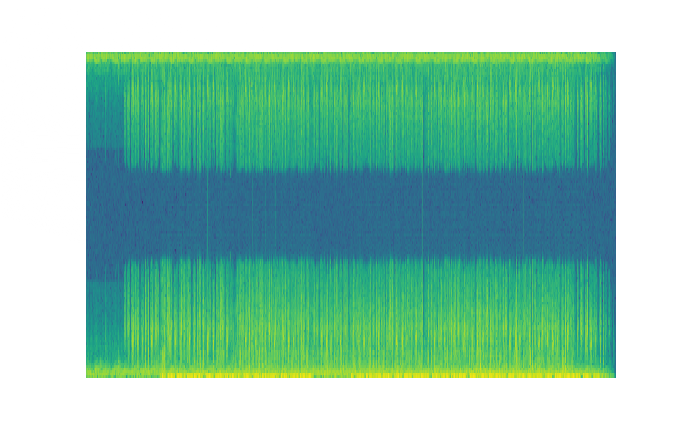

In [159]:
img